In [84]:
#Basic Libs
import pandas as pd
import numpy as np

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Modelling
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV

#Additional
import warnings
warnings.filterwarnings("ignore") 


##Neural Network 
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers.core import Dropout
from keras import models
from keras import layers

#CNN 

from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

#Image Pre-Processing
from keras.preprocessing.image import ImageDataGenerator

In [85]:
#The dataset is available in keras datasets
from keras.datasets import fashion_mnist

#Loading the data into test and train objects
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [86]:
#printing the train labels
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [87]:
# reshape dataset to have a single channel
train_images_cnn = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images_cnn = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [88]:
#Converting labels to categorical features
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Making a holdout for validation and using the rest for train. (80/20)

This will help us tune the parameters.

In [89]:
x_train_partial_cnn, x_val_cnn, y_train_partial_cnn, y_val_cnn = train_test_split(train_images_cnn, train_labels, test_size = 0.2, random_state=17)

In [90]:
# Seeing the shape of test and tarin

print(train_images.shape)
print(test_images.shape)

#the shape looks fine

(60000, 28, 28)
(10000, 28, 28)


In [91]:
#Looking at one individual point
#In this each list corresponds to a row of pixels

train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

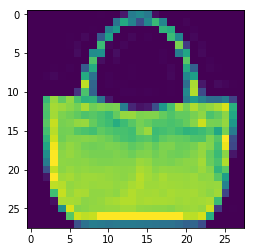

In [92]:
# now lets look at how these matrices values are displayed as images

plt.imshow(train_images[100]);

## Models 

### first basic model 

<b> This has not been mentioned in the assignment but we just wanted to give it a shot and see how the code for digits recognition performs on the fashion dataset

In [93]:
#Creating the network architecture

network = models.Sequential() #sequential models
network.add(layers.Flatten())
network.add(layers.Dense(512, activation='relu')) # 512 features are created from the input ones
network.add(layers.Dense(10, activation='softmax')) #This is the final layer that has ten categories who probabilties add to 1.

In [94]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [95]:
network.fit(x_train_partial_cnn, y_train_partial_cnn, epochs=5, batch_size=128)

Epoch 1/5
48000/48000 [==============================] - 15s 314us/step - loss: 19.4788 - accuracy: 0.7148
Epoch 2/5
48000/48000 [==============================] - 12s 244us/step - loss: 0.8634 - accuracy: 0.7937s - loss: 0.8652 - accura
Epoch 3/5
48000/48000 [==============================] - 11s 224us/step - loss: 0.6781 - accuracy: 0.8204
Epoch 4/5
48000/48000 [==============================] - 13s 273us/step - loss: 0.6385 - accuracy: 0.8285
Epoch 5/5
48000/48000 [==============================] - 13s 265us/step - loss: 0.5707 - accuracy: 0.8394


In [96]:
test_loss_cnn, test_acc_cnn = network.evaluate(test_images_cnn, test_labels)

10000/10000 [==============================] - 9s 898us/step


In [97]:
test_acc_cnn

0.6830000281333923

### Multi-layer perceptron

* As mentioned in the assignment it needs to have four hidden layers.
* Also, we have tried the funneling approach reducing the number of nodes in each progressive layer
* A lot of code has been replicated from FChollets book to which we give due credit and appreciation


In [98]:
#Creating the model1 architecture

model1 = models.Sequential() #sequential models
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu')) # 512 features are created from the input ones
model1.add(layers.Dense(256, activation='relu')) # 256 features are created from the input ones
model1.add(layers.Dense(128, activation='relu')) # 128 features are created from the input ones
model1.add(layers.Dense(64, activation='relu')) # 64 features are created from the input ones
model1.add(layers.Dense(10, activation='softmax')) #This is the final layer that has ten categories who probabilties add to 1.

In [99]:
# Compiling the model
# since many categories are present, I have used categorical_crossentropy

model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [100]:
# The history variable will have all the parameters for model fitting
#This will be easier for visualization and tuning

history = model1.fit(x_train_partial_cnn,
                    y_train_partial_cnn,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val_cnn, y_val_cnn))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 270us/step - loss: 14.7015 - accuracy: 0.5609 - val_loss: 1.3388 - val_accuracy: 0.6758
Epoch 2/10
48000/48000 [==============================] - 12s 259us/step - loss: 1.1452 - accuracy: 0.6973 - val_loss: 0.6281 - val_accuracy: 0.7708
Epoch 3/10
48000/48000 [==============================] - 13s 262us/step - loss: 0.7696 - accuracy: 0.7465 - val_loss: 0.5311 - val_accuracy: 0.8202
Epoch 4/10
48000/48000 [==============================] - 12s 243us/step - loss: 0.5756 - accuracy: 0.7957 - val_loss: 0.6299 - val_accuracy: 0.8118
Epoch 5/10
48000/48000 [==============================] - 12s 258us/step - loss: 0.5126 - accuracy: 0.8151 - val_loss: 0.4057 - val_accuracy: 0.8518
Epoch 6/10
48000/48000 [==============================] - 12s 254us/step - loss: 0.4570 - accuracy: 0.8318 - val_loss: 0.4780 - val_accuracy: 0.8292
Epoch 7/10
48000/48000 [==============================]

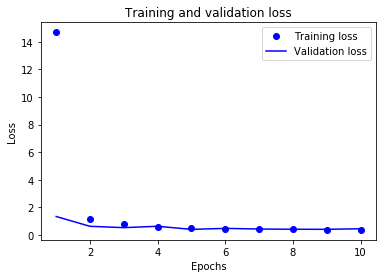

In [101]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

From above, it looks like that it begins to overfit around 6th epoch. <br>
So we are going to retrain the model from scratch and try to predict the for test set

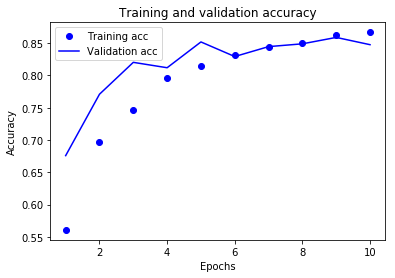

In [102]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From here it look like that even 10 might not be a bad choice to limit it for overfitting. 

So we are taking 10 as the number of epoch for the final model

<b> Retraining the model from scratch

In [103]:
# We are training the whole model from begining here

model1 = models.Sequential() #sequential models
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) # 512 features are created from the input ones
model1.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,))) #
model1.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,))) #
model1.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,))) # 
model1.add(layers.Dense(10, activation='softmax')) #This is the final layer that has ten categories who probabilties add to 1.


model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
model1.fit(x_train_partial_cnn,
            y_train_partial_cnn,
            epochs=11,
            batch_size=512,
            validation_data=(x_val_cnn, y_val_cnn))

Train on 48000 samples, validate on 12000 samples
Epoch 1/11
48000/48000 [==============================] - 15s 308us/step - loss: 16.2703 - accuracy: 0.5588 - val_loss: 1.6409 - val_accuracy: 0.6595
Epoch 2/11
48000/48000 [==============================] - 12s 258us/step - loss: 1.4499 - accuracy: 0.6886 - val_loss: 0.6678 - val_accuracy: 0.7563
Epoch 3/11
48000/48000 [==============================] - 11s 227us/step - loss: 0.8294 - accuracy: 0.7467 - val_loss: 0.5599 - val_accuracy: 0.7903
Epoch 4/11
48000/48000 [==============================] - 11s 225us/step - loss: 0.6071 - accuracy: 0.7921 - val_loss: 0.5709 - val_accuracy: 0.7905
Epoch 5/11
48000/48000 [==============================] - 11s 230us/step - loss: 0.5530 - accuracy: 0.8090 - val_loss: 0.6651 - val_accuracy: 0.7721
Epoch 6/11
48000/48000 [==============================] - 12s 243us/step - loss: 0.4600 - accuracy: 0.8347 - val_loss: 0.4600 - val_accuracy: 0.8335
Epoch 7/11
48000/48000 [==============================]

In [105]:
results = model1.evaluate(test_images_cnn, test_labels)

10000/10000 [==============================] - 3s 259us/step


In [106]:
results

[0.48003657822608947, 0.8458999991416931]

As it can be seen above the accuracy is about 88%.

### Baseline CNN model.

* In this we have fit the baseline CNN model
* We have modified the parameters to the best of our intuition

In [107]:
#Creating the cnn model
model_cnn = models.Sequential() # The different layers will be added in a seqeunce

# Adding a convulusion layer
model_cnn.add(Convolution2D(15,3, 3, input_shape=(28, 28,1), activation='relu',border_mode= 'same'))
#Pooling layer to donsize the data extract maximum in the filter 
model_cnn.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# Dropout to fight overfitting
model_cnn.add(Dropout(0.2))
#Another pooling layer with 64 filters this time. Relu activation to make sure no value is negative
model_cnn.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
#Another pooling layer with same padding
model_cnn.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
#naother dropout layer to combat overfitting.
model_cnn.add(Dropout(0.1))
          
# Creating a regular neural network
model_cnn.add(Flatten()) # Flattens the output from cnn for nn
model_cnn.add(Dense(256, activation='relu')) #regular hiddden layer with 256 nodes
model_cnn.add(Dense(128, activation='relu')) #regular hiddden layer with 128 nodes
          
# Final output layer with ten nodes, one for each category
model_cnn.add(Dense(10, activation='softmax'))

In [108]:
model_cnn.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [110]:
%%time

history =    model_cnn.fit(x_train_partial_cnn,
             y_train_partial_cnn,
             batch_size=64,
             epochs=10,
             validation_data=(x_val_cnn, y_val_cnn))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 135s 3ms/step - loss: 0.9173 - accuracy: 0.7870 - val_loss: 0.3997 - val_accuracy: 0.8648
Epoch 2/10
48000/48000 [==============================] - 140s 3ms/step - loss: 0.3763 - accuracy: 0.8621 - val_loss: 0.3368 - val_accuracy: 0.8770
Epoch 3/10
48000/48000 [==============================] - 126s 3ms/step - loss: 0.3275 - accuracy: 0.8786 - val_loss: 0.2893 - val_accuracy: 0.8933
Epoch 4/10
48000/48000 [==============================] - 124s 3ms/step - loss: 0.2918 - accuracy: 0.8905 - val_loss: 0.2819 - val_accuracy: 0.8988
Epoch 5/10
48000/48000 [==============================] - 125s 3ms/step - loss: 0.2718 - accuracy: 0.9004 - val_loss: 0.2642 - val_accuracy: 0.9056
Epoch 6/10
48000/48000 [==============================] - 126s 3ms/step - loss: 0.2571 - accuracy: 0.9040 - val_loss: 0.2438 - val_accuracy: 0.9106
Epoch 7/10
48000/48000 [==============================] - 124s

In [111]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images_cnn, test_labels)

10000/10000 [==============================] - 8s 827us/step


In [112]:
test_acc_cnn

0.9032999873161316

### Image Standarization 

In [113]:
from keras.preprocessing.image import ImageDataGenerator

#### CNN 

The data is cleaned/standarised using the Image data Generattor. Many different functions can be applied in the same generator.
* <b> feature_wise_center, feature_wise_std_normalization </b> -  This centers and scales the image
* <b> rescale </b> - This converts all the pixels value in the range (0,1). A lot of blogs suggest that NN likes small inputs.
* <b> zca whitening </b> - This emphasized the pixels that have some objects. Its sort of cousin to PCA.
* <b> rotation_range </b> - Rotates the images in the mentioned range (Max).
* <b> Horizontal/Vertical Flip </b>  - Flips the image around the axis.

Then the generator is fit into the model, pretty much similar to fitting the data. In this case 'class_mode' arguement is not working. The probable issue is the version of TF. But its fine without that as well.

Should discuss with Prof.Dave how much epochs to run for.

In [114]:
train_datagen_cnn = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,rescale=1./255,
                             zca_whitening=True, rotation_range=90,horizontal_flip=True, vertical_flip=True)

test_datagen_cnn = ImageDataGenerator(rescale=1./255)

#, class_mode='categorical'

train_generator_cnn = train_datagen_cnn.flow(x_train_partial_cnn, y_train_partial_cnn)
validation_generator_cnn = test_datagen_cnn.flow(x_val_cnn, y_val_cnn)


In [133]:
%%time

model_cnn.fit_generator(train_generator_cnn, steps_per_epoch=420,epochs=60, validation_data=validation_generator_cnn)

Epoch 1/60
420/420 [==============================] - 57s 135ms/step - loss: 0.5635 - accuracy: 0.7940 - val_loss: 0.6155 - val_accuracy: 0.8077
Epoch 2/60
420/420 [==============================] - 54s 129ms/step - loss: 0.5677 - accuracy: 0.7870 - val_loss: 0.6677 - val_accuracy: 0.8151
Epoch 3/60
420/420 [==============================] - 54s 129ms/step - loss: 0.5575 - accuracy: 0.7971 - val_loss: 0.4467 - val_accuracy: 0.8166
Epoch 4/60
420/420 [==============================] - 54s 128ms/step - loss: 0.5576 - accuracy: 0.7933 - val_loss: 0.4804 - val_accuracy: 0.8064
Epoch 5/60
420/420 [==============================] - 54s 130ms/step - loss: 0.5673 - accuracy: 0.7935 - val_loss: 0.5755 - val_accuracy: 0.8061
Epoch 6/60
420/420 [==============================] - 54s 128ms/step - loss: 0.5521 - accuracy: 0.7946 - val_loss: 0.5189 - val_accuracy: 0.8264
Epoch 7/60
420/420 [==============================] - 54s 129ms/step - loss: 0.5612 - accuracy: 0.7946 - val_loss: 0.3445 - val_ac

420/420 [==============================] - 79s 188ms/step - loss: 0.5018 - accuracy: 0.8155 - val_loss: 0.3470 - val_accuracy: 0.8336
Epoch 58/60
420/420 [==============================] - 71s 169ms/step - loss: 0.5071 - accuracy: 0.8144 - val_loss: 0.3663 - val_accuracy: 0.8407
Epoch 59/60
420/420 [==============================] - 59s 141ms/step - loss: 0.4958 - accuracy: 0.8129 - val_loss: 0.5775 - val_accuracy: 0.8338
Epoch 60/60
420/420 [==============================] - 56s 134ms/step - loss: 0.4903 - accuracy: 0.8194 - val_loss: 0.6626 - val_accuracy: 0.8221
Wall time: 58min 26s


Fitting the model after pre-processing

In [128]:
# I am scaling the images in this.
# Because when I did without scaling, the results were awful
# This is probably because the network has been trained for that scale
test_images_cnn_1 = test_images_cnn.astype('float32') / 255

In [129]:
#Evaluating the results on model trained on standarised samples
model_cnn.evaluate(test_images_cnn_1,test_labels)


10000/10000 [==============================] - 8s 828us/step


[0.5608284721851349, 0.7961999773979187]

In [130]:
test_acc_cnn

# The current training of the model is roughly equal to two epochs of normal cnn
# Thus if we train it for more epochs, this should improve.

0.7961999773979187

#### MLP 

In [118]:
#Fitting the mlp with the generator that creates randomness in the images. 

model1.fit_generator(train_generator_cnn, steps_per_epoch=420,epochs=30, validation_data=validation_generator_cnn)

Epoch 1/30
420/420 [==============================] - 18s 43ms/step - loss: 1.4197 - accuracy: 0.4665 - val_loss: 0.9640 - val_accuracy: 0.5936
Epoch 2/30
420/420 [==============================] - 20s 48ms/step - loss: 1.0918 - accuracy: 0.5911 - val_loss: 0.7033 - val_accuracy: 0.6833
Epoch 3/30
420/420 [==============================] - 19s 45ms/step - loss: 1.0143 - accuracy: 0.6255 - val_loss: 0.6299 - val_accuracy: 0.6658
Epoch 4/30
420/420 [==============================] - 18s 44ms/step - loss: 0.9615 - accuracy: 0.6397 - val_loss: 1.0365 - val_accuracy: 0.7022
Epoch 5/30
420/420 [==============================] - 18s 43ms/step - loss: 0.9414 - accuracy: 0.6469 - val_loss: 0.4070 - val_accuracy: 0.7407
Epoch 6/30
420/420 [==============================] - 20s 49ms/step - loss: 0.9103 - accuracy: 0.6648 - val_loss: 0.5647 - val_accuracy: 0.7356
Epoch 7/30
420/420 [==============================] - 17s 41ms/step - loss: 0.8820 - accuracy: 0.6741 - val_loss: 0.6701 - val_accuracy:

In [132]:
test_loss_mlp, test_acc_mlp = model1.evaluate(test_images_cnn, test_labels)
test_acc_mlp

# This is just equivalent to one epoch if that is increased this should also go up.

10000/10000 [==============================] - 3s 257us/step


0.698199987411499

## Observation 

Following are the things we observed:

The dataset had ten different categories. We displayed random images and realized that they are different fashion products as the name suggests. 

We created a perceptron with a single hidden layer with 512 nodes. Its accuracy was about 88% on the test set. This was not mentioned in the question but we tried it just to set the benchmark for the most basic NN model. </br>

We also created a multi-layered perceptron as mentioned in the question. It was tending to overfit after a 10 epochs. Thus we 
retrained the model to run only for 10 epochs. We chose to go with the funneling technique reducing the number of nodes in each layer. This was one of the many techniques discussed in class. The accuracy was around 88% on the test set. The surprising this here was despite addition of three hidden layers, there was no improvement in accuracy. </br>

We then created a CNN model. We added two sequences of convulusion-pooling-dropout based on the parameters to the best of our intuition. This model was two percentage points better than the multi-layer perceptron. </br>

After Image preprocessing we tried the models again. We only implemented scaling in validation data set and no other transformations. We noticed that after this the performance of CNN improved but not of the MLP. This might be attributed to the fact that the CNN learns local pattersn irrespective to its placement in the image unlike the MLP. Thus its performance improvement as it was able to patternize better. Our next step would be trying different combinations of parameters and different pre-trained networks to make things better.